In [110]:
from scipy import signal
from scipy.signal import butter, lfilter, freqz
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import statistics 
#Fourier Transform
from scipy.fftpack import fft
import random

#Pump and Probe "strength"
s=100
#N=Number of points
N=500


#I want a pulse (point in array) at 1ms, this is my time array
pulsewidth=0.001
t1ms=np.arange(0., N*pulsewidth, pulsewidth)


#Pump array
pumparray=np.random.poisson(s, N)
pumpmean=statistics.mean(pumparray)
pumpstdev=statistics.stdev(pumparray)
pumproundedstdev=round(pumpstdev,3)
pumproundedmean=str(round(pumpmean,3))
print(f"The standard deviation of the Pump array is {pumproundedstdev} and the mean is {pumproundedmean}")


probearray=np.random.poisson(s,N)
probemean=statistics.mean(probearray)
probestdev=statistics.stdev(probearray)
proberoundedstdev=round(probestdev,3)
proberoundedmean=str(round(probemean,3))
print(f"The standard deviation of the Probe Array is {proberoundedstdev} and the mean is {proberoundedmean}")

signalstrength = 0.01*s

signal1=N*[float(signalstrength)]

The standard deviation of the Pump array is 9.274 and the mean is 100
The standard deviation of the Probe Array is 10.0 and the mean is 101


In [111]:
# Frequencies
fpump = 100
fprobe = 0

#Phase
pumpphase= 0
probephase= 0

In [112]:
#modulations
squarewavepump= 1/2*(signal.square(2*np.pi*fpump*t1ms+pumpphase)+abs(signal.square(2*np.pi*fpump*t1ms+pumpphase)))
squarewaveprobe = 1/2*(signal.square(2*np.pi*fprobe*t1ms+probephase)+abs(signal.square(2*np.pi*fprobe*t1ms+probephase)))

#pump modulation
modpump = squarewavepump * pumparray

#probe modulation
modprobe = squarewaveprobe * probearray

In [146]:
#Signal only occurs when the pump and the probe match up 
Isignal = squarewavepump*squarewaveprobe* signal1

#the total is the sum of all the arrays 
measuredsignal = modpump + modprobe + Isignal

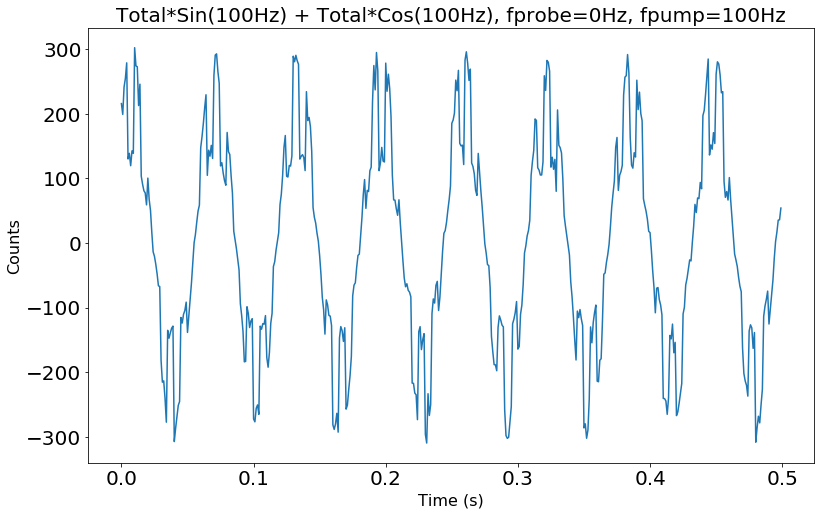

In [159]:
#This is the lock in signal I am muliplying by sin(fpump) and cos(fpump) then I will add the results
sin1=np.sin((fpump)*t1ms)
cos1=np.cos((fpump)*t1ms)
locked1=sin1 * measuredsignal + cos1* measuredsignal
plt.figure(figsize=(13,8))
plt.tick_params(labelsize=20)
plt.ylabel('Counts')
plt.xlabel('Time (s)')
plt.title("Total*Sin("+str(fpump)+"Hz)" + " + Total*Cos("+str(fpump)+"Hz)" +", fprobe="+str(fprobe)+"Hz" +
          ", fpump="+str(fpump)+"Hz", fontsize=20)
plt.plot(t1ms,locked1)
plt.show()

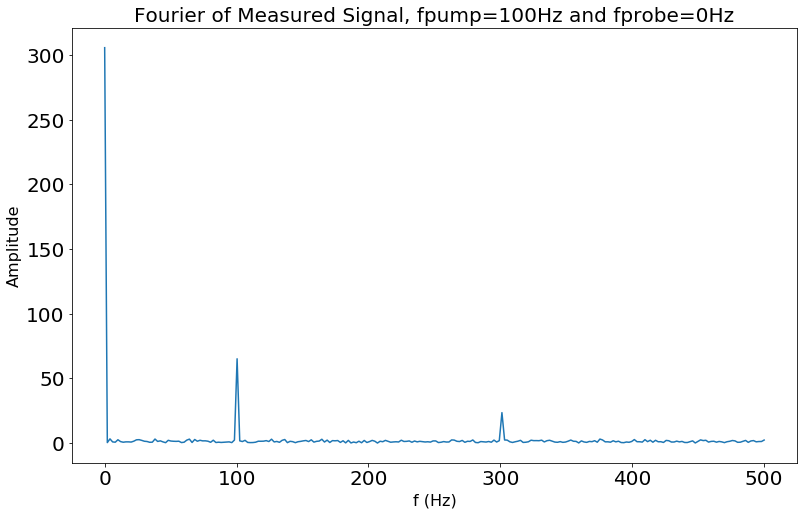

In [144]:
# Here is the fourier transform of the measured signal
x1 = t1ms
yf1 = fft(measuredsignal)
xf1 = np.linspace(0.0, 1.0/(2.0*pulsewidth), N//2)
plt.figure(figsize=(13,8))
plt.tick_params(labelsize=20)
plt.ylabel('Amplitude')
plt.xlabel('f (Hz)')
plt.title(f"Fourier of Measured Signal, fpump={fpump}Hz and fprobe={fprobe}Hz", fontsize=20)
plt.plot(xf1, 2.0/N * np.abs(yf1[0:N//2]))
plt.show()

#Here we can see there is a DC component

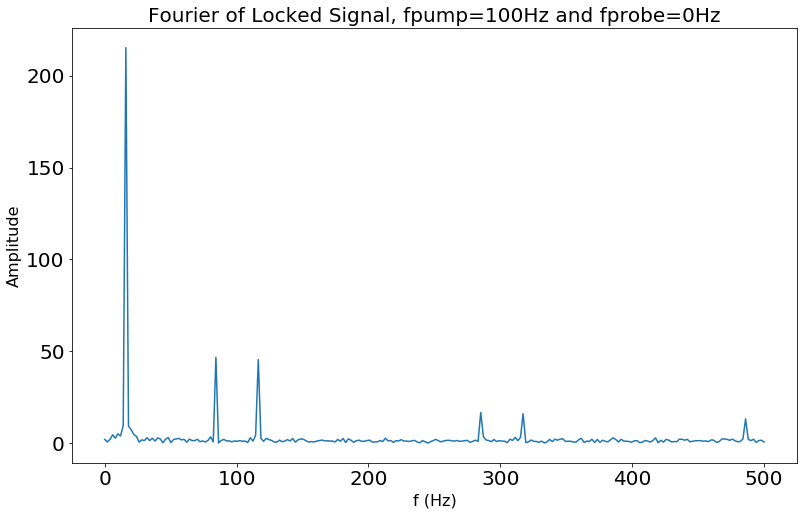

In [145]:
# Here is the fourier transform of the locked signal
x2 = t1ms
yf2 = fft(locked1)
xf2 = np.linspace(0.0, 1.0/(2.0*pulsewidth), N//2)
plt.figure(figsize=(13,8))
plt.tick_params(labelsize=20)
plt.ylabel('Amplitude')
plt.xlabel('f (Hz)')
plt.title(f"Fourier of Locked Signal, fpump={fpump}Hz and fprobe={fprobe}Hz", fontsize=20)
plt.plot(xf2, 2.0/N * np.abs(yf2[0:N//2]))
plt.show()

#Here we can see there is no DC component

In [ ]:
#Why is there no DC component for the lcked signal? 